In [25]:
import math

import numpy as np
from lab1.plot import plotter
from lab2 import methods as lab2
from scipy.optimize import approx_fprime
import methods

In [26]:
np.random.seed(12)


def generate_points(n, dim, f):
    X = np.random.rand(n, dim)
    y = []
    X_err = X + 0.1 * np.random.randn(n, dim)
    for x in X_err:
        y.append(f(x))
    return X, np.asarray(y)


def mse(X, y, w):
    res = 0
    for i in range(0, len(y)):
        x = 0
        for j in range(0, len(X[i])):
            x += X[i][j] * w[j]
        res += np.square(y[i] - x)
    return res / len(y)


def mse_func(X, y):
    return lambda w: mse(X, y, w)


def grad_calculator(x, func, n):
    h = 1e-5
    res = []
    for i in range(n):
        delta = np.zeros(n)
        delta[i] = h
        res.append((func(x + delta) - func(x - delta)) / (2 * h))
    return np.asarray(res)


def grad_func(f, n):
    return lambda x: grad_calculator(x, f, n)

In [27]:
def target_func(x):
    return 5 * x[0] + 2 * x[1]


def gauss_func(p):
    return lambda x: p[0] * x[0] + p[1] * x[1]


n = 100
dim = 2
(X, y) = generate_points(n, dim, target_func)
f = mse_func(X, y)
grad = grad_func(f, dim)
hess = lambda x0: approx_fprime(x0, lambda t: approx_fprime(t, f))

In [29]:
def print_info(name, start, points, grad_calc, func_calc):
    print("start:", start)
    print("{}:".format(name))
    print(points[-1], f(points[-1]))
    print("gradient calculations:", grad_calc)
    print("function calculations:", func_calc)


def plot_from_start(start):
    lr = lambda x: 2

    # (points1, grad_calc1, func_calc1) = lab2.sgd_with_momentum(f, grad, start, learning_rate=lr)
    # print_info("Momentum", start, points1, grad_calc1, func_calc1)

    # (points2, grad_calc2, func_calc2) = lab2.sgd_nesterov(f, grad, start, learning_rate=lr)
    # print_info("Nesterov", start, points2, grad_calc2, func_calc2)

    #(points3, grad_calc3, func_calc3) = lab2.sgd_adagrad(f, grad, start, learning_rate=lr)
    #print_info("AdaGrad", start, points3, grad_calc3, func_calc3)

    #(points4, grad_calc4, func_calc4) = lab2.sgd_rmsprop(f, grad, start, learning_rate=lr)
    #print_info("RMSProp", start, points4, grad_calc4, func_calc4)

    #(points5, grad_calc5, func_calc5) = lab2.sgd_adam(f, grad, start, learning_rate=lr)
    #print_info("Adam", start, points5, grad_calc5, func_calc5)

    #(points6, grad_calc6, func_calc6) = methods.bfgs(f, grad, start)
    #print_info("BFGS", start, points6, grad_calc6, func_calc6)

    (points7, grad_calc7, func_calc7) = methods.l_bfgs(f, grad, start)
    print_info("L-BFGS", start, points7, grad_calc7, func_calc7)

    #(points8, grad_calc8, func_calc8) = methods.gauss_newton(gauss_func, methods.jacobian_gauss, X, y, start, eps=1e-6)
    #print_info("Gauss-Newton", start, points8, grad_calc8, func_calc8)

    #(points9, grad_calc9, func_calc9) = methods.trust_region_dogleg(f, grad, hess, start)
    #print(points9)
    #print_info("Powell Dog Leg", start, points9, grad_calc9, func_calc9)
    points9 = powell_dogleg(f, start)
    print(points9)

    #plotter.multiple_points_over_contour(f, points1, points2, name1="Momentum", name2="Nesterov").show()

    # plotter.multiple_points_over_contour(f, points4, points3, name1="RMSProp", name2="AdaGrad",).show()

    # plotter.multiple_points_over_contour(f, points5, name1="Adam").show()

    # plotter.multiple_points_over_contour(f, points6, name1="BFGS").show()

    plotter.multiple_points_over_contour(f, points7, name1="L-BFGS").show()

    #plotter.multiple_points_over_contour(f, points8, name1="Gauss-Newton").show()

    plotter.multiple_points_over_contour(f, points9, name1="Powell Dog Leg").show()

start: [5, 12]
L-BFGS:
[4.84285018 2.02368802] 0.29251425843155504
gradient calculations: 27
function calculations: 18
[[ 5 12]]


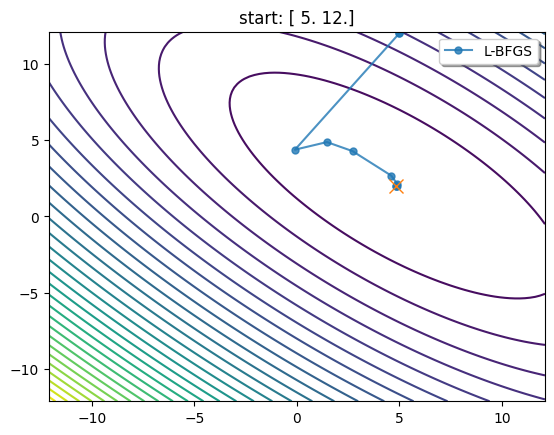

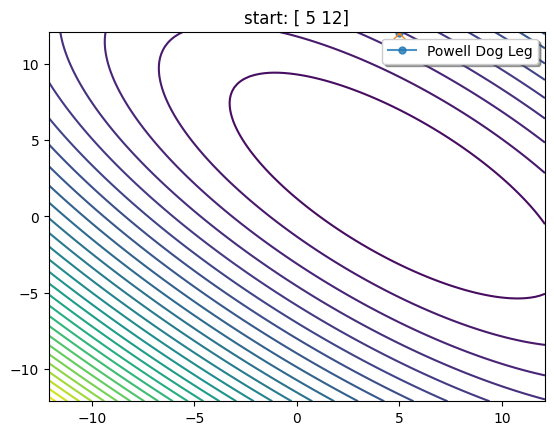

In [30]:
plot_from_start([5, 12])

In [ ]:
plot_from_start([-0.5, 0])

start: [-0.5, 0]
L-BFGS:
[4.84283597 2.02371515] 0.2925142582841771
gradient calculations: 27
function calculations: 18


C:\Users\awishy\AppData\Local\Temp\ipykernel_7844\4225263822.py:44: RuntimeWarning: invalid value encountered in divide
  B += np.outer(g - g_new, g - g_new) / np.dot(g - g_new, x - x_new)


In [ ]:
plot_from_start([2, 3])

In [ ]:
plot_from_start([-10, 0])

In [ ]:
plot_from_start([0.9504983984550248, -0.766835117539493])

In [ ]:
#generate 4 dots
dots = plotter.generate_n_dots(4)

In [ ]:
for i in dots:
    plot_from_start(i)
